# ARQUITECTURA

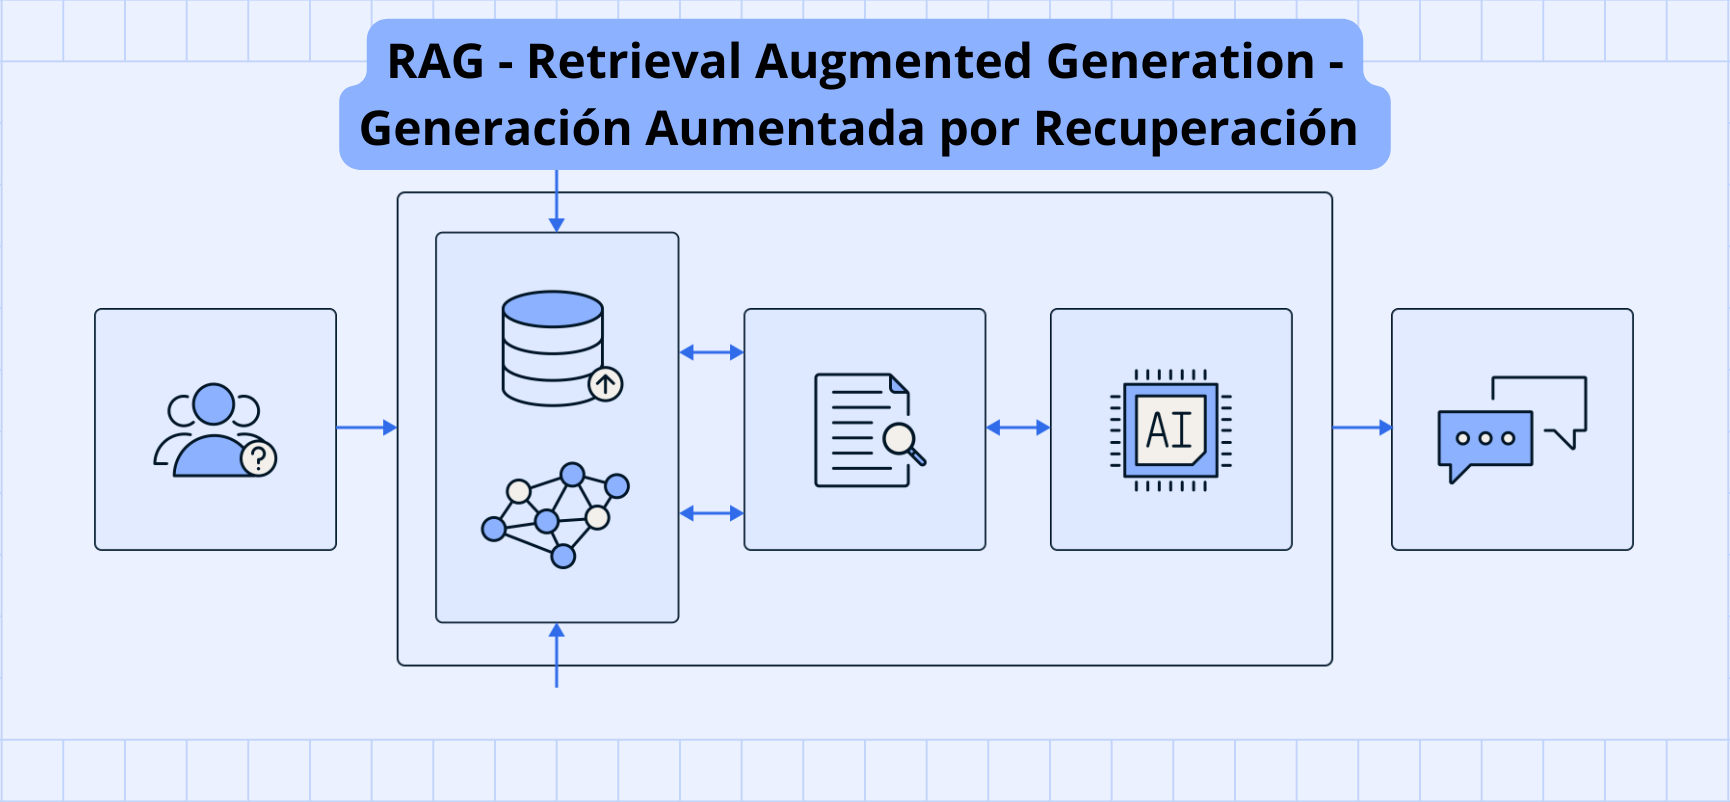

# **¿Qué es un RAG?**

Imagina un asistente que busca información y la utiliza para generar texto nuevo y coherente. Eso es RAG.

Aplicaciones de RAG

RAG tiene varias aplicaciones interesantes:

**Chatbots y asistentes virtuales:** RAG mejora la capacidad de los chatbots para responder a preguntas complejas y generar texto personalizado.

**Generación de contenido:** RAG puede automatizar la creación de contenido, como artículos y resúmenes, ahorrando tiempo y esfuerzo.

**Análisis de sentimiento:** RAG analiza el sentimiento y la opinión en texto, lo que es útil en marketing y finanzas.

**Investigación y desarrollo:** RAG puede ser utilizado para ayudar a los investigadores a analizar grandes cantidades de datos y generar hipótesis y conclusiones.

**Atención al cliente:** RAG puede ser utilizado para generar respuestas personalizadas a preguntas frecuentes y resolver problemas de los clientes de manera más eficiente.

RAG es una tecnología que combina búsqueda de información y generación de texto para crear contenido nuevo y valioso.


# ETAPA 1:
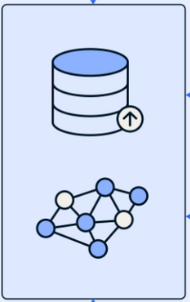

# ETAPA 1:

# **1. Instalación de Herramientas para Análisis de Textos**
Preparamos el entorno de ejecución para desempeñar la tarea. T.E: (1 min)

In [ ]:
#Instalación de paquetes
!pip install pypdf langchain_community langchain-text-splitters langchain_chroma sentence_transformers faiss-cpu openai

# **2. Cargando un Archivo PDF con Langchain**
Éste código carga un archivo PDF y extrae su contenido utilizando la herramienta Langchain, PyPDFLoader. T.E: (1 seg)

In [ ]:
#Cargue del PDF con PyPDFLoader
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("libro1.pdf")
pages = loader.load()
print(pages)

# **3. Unir el Contenido de un Archivo PDF en un Solo Texto**
Éste código toma un archivo PDF y une todo su contenido en un solo texto, eliminando los saltos de línea y agregando espacios para separar las páginas. T.E: (1 seg)

In [ ]:
#Vamos a generar un texto plano con el pagecontent, al que le eliminamos saltos de linea para poder hacer chunks
textoSalida = ''
for Document in pages:
    # Eliminar los saltos de línea y agregar el contenido al textoSalida
    texto_limpio = Document.page_content.replace('\n', ' ')
    textoSalida += texto_limpio + ' '  # Añadir un espacio para separar los contenidos

print(textoSalida)

# **4. Dividir un Texto en Pedazos Más Pequeños**
Éste código configura una herramienta para dividir un texto en pedazos más pequeños, con un tamaño máximo de 500 caracteres y un solapamiento de 100 caracteres entre cada pedazo. Esto es útil para trabajar con textos largos y procesarlos de manera más eficiente. T.E: (1 seg)

In [3]:
#Creamos el text splitter y lo configuramos
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2500,
    chunk_overlap=250,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
texts = text_splitter.split_text(textoSalida)
print(texts)


# ETAPA 2:

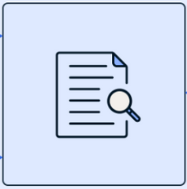

# **5. Configurar un Modelo de Lenguaje para Análisis de Texto**
Imagina que quieres analizar un texto y entender su significado. Para hacer esto, necesitas un modelo de lenguaje que pueda comprender el texto y extraer información importante de él.

Este código configura un modelo de lenguaje llamado Hugging Face Embeddings que es una herramienta muy potente para analizar textos. La función embeddingSetup toma un parámetro model que es el nombre del modelo de lenguaje que se quiere utilizar.

En este caso, se utiliza el modelo gagan3012/Multilingual-mistral, que es un modelo entrenado para entender textos en varios idiomas, incluyendo el español.

Nota: Los comentarios en el código (#) son nombres de otros modelos de lenguaje que se podrían utilizar en lugar de gagan3012/Multilingual-mistral. T.E: (28 seg)

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
def embeddingSetup (model):
    embeddings = HuggingFaceEmbeddings(model_name=model)
    print ("Inicialización de Embeddings")
    return embeddings

embeddings = embeddingSetup ('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
#sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
#gagan3012/Multilingual-mistral
#jinaai/jina-embeddings-v2-base-es
#hackathon-pln-es/paraphrase-spanish-distilroberta
#hiiamsid/sentence_similarity_spanish_es

# **6. Crear un Almacenamiento de Vectores para Búsqueda de Texto**
Este código crea un sistema de búsqueda de texto que permite buscar palabras o frases específicas dentro de un archivo de texto de manera rápida y eficiente. El sistema utiliza un modelo de lenguaje para analizar el texto y crear un índice de búsqueda.

In [6]:
from langchain.vectorstores import FAISS
def vectorStoreCreation(archivo, embedding):
    knowledge_base = FAISS.from_texts(archivo, embedding)
    print ("VECTORSTORE CREADA CON EXITO: ")
    return knowledge_base

In [7]:
knowledge_base = vectorStoreCreation (texts, embeddings)

VECTORSTORE CREADA CON EXITO: 


In [12]:
pregunta = "que es la marcha del ladrillo?"
docs = knowledge_base.similarity_search(pregunta, 5)

In [ ]:
docs

# ETAPA 3
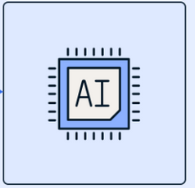



Éste código configura la conexión con OpenAI para utilizar sus herramientas de análisis de texto y respuesta a preguntas. La función establece la clave secreta, crea objetos para interactuar con OpenAI y carga una cadena de preguntas y respuestas.

# **7. Configurar la Conexión con OpenAI**
Éste código configura la conexión con OpenAI para utilizar sus herramientas de análisis de texto y respuesta a preguntas. La función establece la clave secreta, crea objetos para interactuar con OpenAI y carga una cadena de preguntas y respuestas.

In [14]:
def openAIConfig(model_names, chains):
    os.environ["OPENAI_API_KEY"] = "xxxxxxxxxxxxx"
    llm = ChatOpenAI(model_name=model_names)
    chain = load_qa_chain(llm, chain_type=chains)
    print("Configuración OPENAI lograda con éxito.")
    return llm, chain

In [15]:
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.chains.question_answering import load_qa_chain
import os
load_dotenv()

True

In [ ]:
llm, chain = openAIConfig(model_names="gpt-3.5-turbo", chains="stuff")

# ETAPA 4:
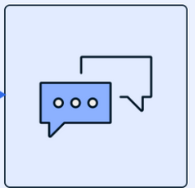

# **8. RAG en funcionamiento, consultas, respuestas, procesamiento con LLM.**

Este código utiliza la biblioteca knowledge_base y chain para realizar una
búsqueda de párrafos similares en una base de conocimientos y luego utiliza el modelo de lenguaje ChatGPT para responder a una pregunta basada en los párrafos similares encontrados. En primer lugar, se define la pregunta "¿Cuál era la opinión de los sobrinos de Yolanda acerca de ella?" y se utiliza la función similarity_search de la biblioteca knowledge_base para buscar los 5 párrafos más similares en la base de conocimientos. Luego, se utiliza la función run de la biblioteca chain para pasar los párrafos similares encontrados como entrada al modelo ChatGPT, junto con la pregunta original, y obtener una respuesta. Finalmente, se imprime la respuesta generada por ChatGPT. En resumen, este código utiliza la búsqueda de párrafos similares para proporcionar contexto al modelo ChatGPT y generar una respuesta más informada y precisa a la pregunta original.

Ejemplo 1:

In [ ]:
#CERON.PDF
pregunta = "¿que es la marcha del ladrillo?"
# Busqueda de párrafos similares
docs = knowledge_base.similarity_search(pregunta, 5)
# Utilizar los parrafos similares para darle contexto a ChatGPT
respuesta = chain.run(input_documents=docs, question=pregunta)
print(f"Respuesta ChatGPT: {respuesta}")

Ejemplo 2:

In [ ]:
#autosalirpais.PDF
pregunta = "¿Que información hay en el texto referente al futbol?"
# Busqueda de párrafos similares
docs = knowledge_base.similarity_search(pregunta, 5)
# Utilizar los parrafos similares para darle contexto a ChatGPT
respuesta = chain.run(input_documents=docs, question=pregunta)
print(f"Respuesta ChatGPT: {respuesta}")

Ejemplo 3:

In [ ]:
#SentenciaInterpretativa.PDF
pregunta = " ¿Cómo se notifica a los sujetos procesales e intervinientes dentro de los macrocasos?"
# Busqueda de párrafos similares
docs = knowledge_base.similarity_search(pregunta, 5)
# Utilizar los parrafos similares para darle contexto a ChatGPT
respuesta = chain.run(input_documents=docs, question=pregunta)
print(f"Respuesta ChatGPT: {respuesta}")

In [ ]:
print(docs)